In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from PIL import Image
import time

In [3]:
filename = os.listdir('./HW3/data')
filename

['baboon.raw', 'lena.raw', 'Noisy.raw', 'F16.raw']

In [5]:
# raw圖片處理
def data_raw_img(path):
    img = np.fromfile(path, dtype='uint8')
    img = img.reshape(512,512)
    #img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
    return img

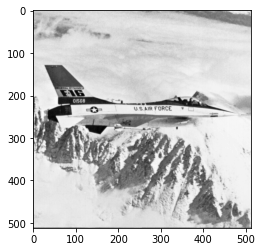

In [6]:
img = data_raw_img(os.path.join('./HW3/data', 'F16.raw'))
plt.imshow(img, cmap ='gray')

In [36]:
kernal_size = 3
kernal = np.random.rand(kernal_size,kernal_size)
def template(kernal_size, img, kernal):
    alpha = int((kernal_size-1)/2)
    mask = np.zeros((img.shape[0], img.shape[1]))
    
    for i in range(alpha,img.shape[0]-alpha):
        for j in range(alpha, img.shape[1]-alpha):
            mask[i, j] = np.sum(np.multiply(kernal, img[i-alpha:i+alpha+1, j-alpha: j+alpha+1]))
    return mask


In [55]:
def R(img, mask):
    R_ = abs(img - mask)
    return(R_)

In [59]:
def P(R_, sigma):
    P_r = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(R_**2/(2*sigma**2)))
    return P_r

In [64]:
def W(P_r):
    p0 = 1 /(P_r.shape[0]*P_r.shape[1])
    W_ = P_r/(P_r+p0)
    return W_

In [75]:
img_try = np.arange(16).reshape(4,4)
mask = template(kernal_size, img_try, kernal)
R_ = R(img_try, mask)
sigma = 100
P_r = P(R_, sigma)
W_ = W(P_r)

In [76]:
a_list = []
for s in range(-1,2):
    for t in range(-1,2):
        for x in range(alpha,img.shape[0]-alpha) :
            for y in range(alpha,img.shape[0]-alpha) :

                a = W_[x,y]*img[x-1,y-1]*img[x-1,y-1]
                a_list.append(a)
        np.sum(a_list)*mask[s,t]

array([[0.06000086, 0.05999804, 0.05998958, 0.05997549],
       [0.05995576, 0.05564447, 0.05382345, 0.05986283],
       [0.05982064, 0.04694392, 0.04429743, 0.05966055],
       [0.05959606, 0.05952605, 0.05945051, 0.05936949]])

In [80]:
for x in range(alpha,img.shape[0]-alpha) :
    for y in range(alpha,img.shape[0]-alpha) :
        for i in range(kernal_size):
            for j in range(kernal_size):
                a= np.multiply(W_[x,y] * img[x+i,y+1], img[x-alpha:x+alpha+1, y-alpha: y+alpha+1])
                mask[i, j]


IndexError: index 4 is out of bounds for axis 1 with size 4